In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal

# Model
from keras.models import Sequential

# Layers
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# MNIST Data Fetching and Preprocessing

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert 28*28 image into 784 size 1D tensor
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Convert labels into one-hot encoded vectors

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Normalize the input data using simple min max normalization

X_train = X_train / 255
X_test = X_test / 255

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def plot_dynamic(x, vy, ty, ax, fig, colors=['b']):
    ax.plot(x, vy, 'r', label='Validation Loss')
    ax.plot(x, ty, 'b', label='Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# Plotting Training/Validation Loss

def plot_loss(history):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Softmax Cross Entropy Loss")
    
    x = list(range(1, n_epochs+1))
    vy = history.history['val_loss']
    ty = history.history['loss']
    
    plot_dynamic(x, vy, ty, ax, fig)

In [0]:
'''
def plot_weight_distribution(weights):
    h1 = weights[0].flatten().reshape(-1, 1)
    h2 = weights[2].flatten().reshape(-1, 1)
    out = weights[4].flatten().reshape(-1, 1)
    fig = plt.figure()
    plt.title("Training Weights Distribution")
    
    plt.subplot(1, 3, 1)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h1, color='b')
    plt.xlabel("Layer 1")
    
    plt.subplot(1, 3, 2)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h2, color='r')
    plt.xlabel("Layer 2")
    
    plt.subplot(1, 3, 3)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=out, color='g')
    plt.xlabel('Out Layer')
    
    plt.show()
'''
# Plot function for weight distribution

def plot_weight_distribution(weights, hidden_layers=None):
    colors = ['b', 'r', 'g', 'y', 'm']
    fig = plt.figure()
    plt.title("Training Weights Distribution")
    
    for i in range(0, hidden_layers+1):
        layer_weights = weights[i*2].flatten().reshape(-1, 1)
        plt.subplot(1, hidden_layers+1, i+1)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=layer_weights, color=colors[i%5])
        if i == hidden_layers:
            plt.xlabel("Out Layer")
        else:
            plt.xlabel("Layer {}".format(i+1))
    plt.show()

In [0]:
# Model Parameters

input_dim = 784
output_dim = 10
batch_size = 100
n_epochs = 20

**MLP (2-hidden layers) + Adam Optimizer + ReLU activations **

In [12]:
# Model Architecture

# Hidden layer 1 --> 256


# Hidden layer 2 --> 64

# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(256, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, 
                                                seed=None)))

# Hidden Layer 2
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))

# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.10167545924528686
Test Accuracy :  0.9802


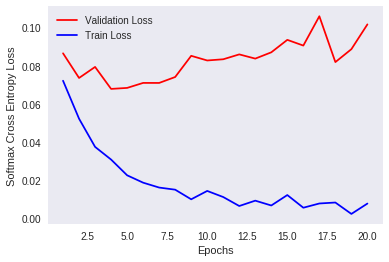

In [0]:
plot_loss(history)

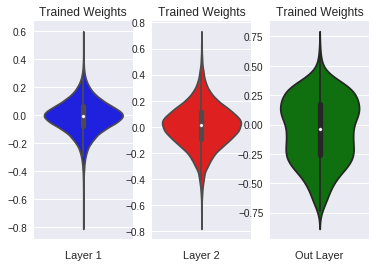

In [0]:
weights = model.get_weights()
plot_weight_distribution(weights)

**MLP (2-hidden layers) + Adam Optimizer + ReLU activations + BatchNorm + Dropout**

In [13]:
# Model Architecture

# Hidden layer 1 --> 256

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.3

# Hidden layer 2 --> 64

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.3


# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(256, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Hidden Layer 2
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total para

In [0]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.06912141052252264
Test Accuracy :  0.9816


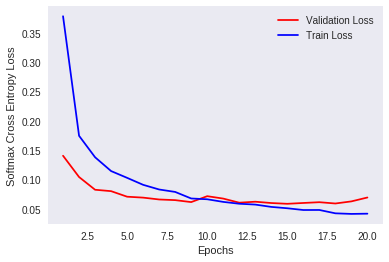

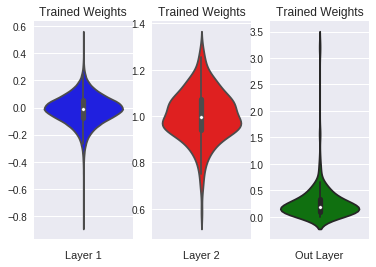

In [0]:
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights)

**MLP (3-hidden layers) + Adam Optimizer + ReLU activations **

In [14]:
# Model Architecture

# Hidden layer 1 --> 1024


# Hidden layer 2 --> 512


# Hidden layer 3 --> 256


# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(1024, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))

# Hidden Layer 2
model.add(Dense(512, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))

# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, 
                                                seed=None)))

# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.09790483784366265
Test Accuracy :  0.9812


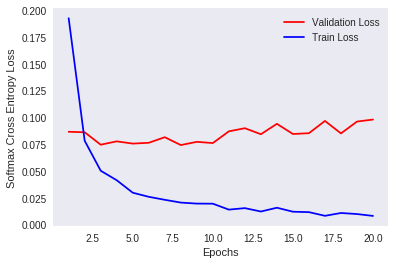

In [0]:
plot_loss(history)

In [0]:
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=5)

**MLP (3-hidden layers) + Adam Optimizer + ReLU activations + BatchNorm + Dropout**

In [15]:
# Model Architecture

# Hidden layer 1 --> 1024

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 2 --> 512

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 3 --> 256

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5


model = Sequential()

# Hidden Layer 1
model.add(Dense(1024, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 2
model.add(Dense(512, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
__________

In [0]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.05362152259176073
Test Accuracy :  0.985


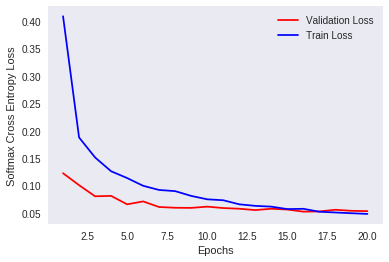

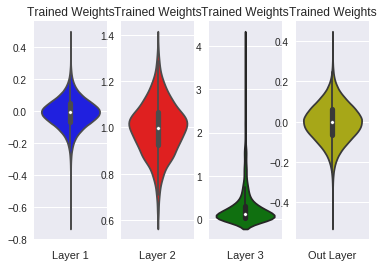

In [0]:
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=3)

**MLP (5-hidden layers) + Adam Optimizer + ReLU activations**

In [16]:
# Model Architecture

# Hidden layer 1 --> 2048


# Hidden layer 2 --> 1024


# Hidden layer 3 --> 256


# Hidden layer 4 --> 128


# Hidden layer 5 --> 64

# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(2048, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))

# Hidden Layer 2
model.add(Dense(1024, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.031, 
                                                seed=None)))

# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))

# Hidden Layer 4
model.add(Dense(128, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))

# Hidden Layer 5
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, 
                                                seed=None)))

# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_29 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                650       
Total params: 4,010,058
Trainable params: 4,010,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.10174559558869126
Test Accuracy :  0.9858


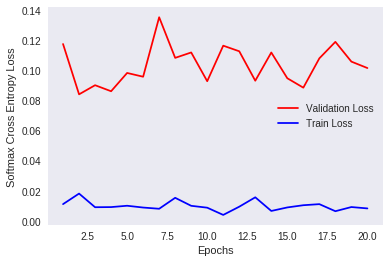

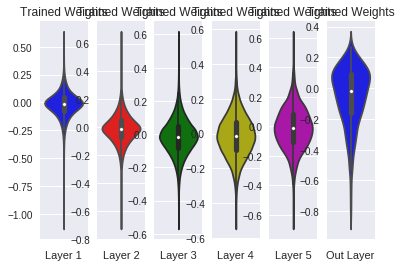

In [0]:
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=5)

**MLP (5-hidden layers) + Adam Optimizer + ReLU activations + BatchNorm + Dropout**

In [17]:
# Model Architecture

# Hidden layer 1 --> 2048

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 2 --> 1024

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 3 --> 256

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 4 --> 128

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 5 --> 64

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(2048, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 2
model.add(Dense(1024, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.031, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 4
model.add(Dense(128, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 5
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
batch_normalization_16 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_16 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_17 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               262400    
__________

Test Loss :  0.05905918826502748
Test Accuracy :  0.9854


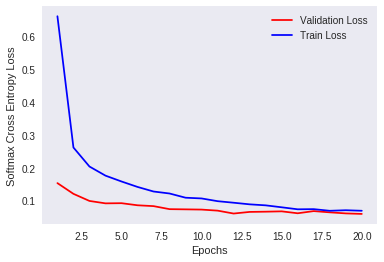

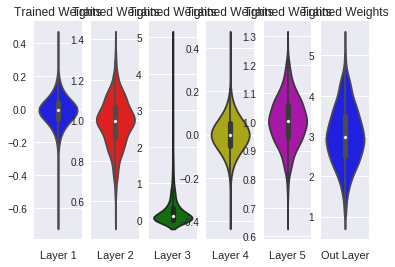

In [11]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=5)

# Observations



**1. 2 hidden layer(256-64)  --> Loss = 0.10,  Accuracy = 98.02%**

**2. 2 hidden layer(256-64)  --> Loss = 0.069,  Accuracy = 98.16%**

**3. 3 hidden layer(1024-512-256)  --> Loss = 0.097,  Accuracy = 98.12%**

**4. 3 hidden layer(1024-512-256)  --> Loss = 0.053,  Accuracy = 98.50%**

**5. 5 hidden layer(2048-1024-256-128-64)  --> Loss = 0.10,  Accuracy = 98.58%**

**6. 5 hidden layer(2048-1024-256-128-64)  --> Loss = 0.059,  Accuracy = 98.54%**


*Getting best accuracy with 5 hidden layers and 3 hidden layers with batch normalization and dropout rate of 0.5. *

*Also the Train and Test Loss follow each other very closely when we use dropout and batch normalization layers.*